In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
import os

# FIR filter taps of 61-tap array Bn
Bn = [
    -17,    -37,     12,     79,     69,    -77,   -196,    -68,    246,
    339,    -48,   -531,   -418,    349,    868,    308,   -839,  -1110,
    82,   1407,   1085,   -736,  -1851,   -686,   1496,   1957,    -44,
    -2110,  -1619,    905,   2346,    905,  -1619,  -2110,    -44,   1957,
    1496,   -686,  -1851,   -736,   1085,   1407,     82,  -1110,   -839,
    308,    868,    349,   -418,   -531,    -48,    339,    246,    -68,
    -196,    -77,     69,     79,     12,    -37,    -17
]

What is the length of this filter?

In [26]:
# print the length of the array
L = len(Bn)
print(L)

61


what's the order N of this filter?

In [27]:
# print the order N of this filter
N = L - 1
print(N)

60


what is the expected group delay in samples and in seconds, assuming input signal being real-valued.

In [28]:
# print the expected group delay of this filter in samples\
Fs = 48000
group_delay_samples = (N) / 2
print(group_delay_samples)

# print the expected group delay of this filter in seconds
group_delay = group_delay_samples / Fs
print(group_delay)

30.0
0.000625


what is the expected phase shift for a 1kHz inpyt in degrees?

In [29]:
# print the expected phase delay of this filter in seconds
phase_shift = group_delay * 2 * math.pi
input_freq = 1000
phase_delay = phase_shift * input_freq * 180 / (math.pi)
print(phase_delay )

225.00000000000003


What is the lowest frequency, where you would expect to see a 180 ̊ phase shift?

In [30]:
# the lowest frequency where one would expect to see a 180 degree phase shift is at 1/2 the sampling rate
phase_shift = group_delay * 2 * math.pi
input_freq = 24000
phase_delay = phase_shift * input_freq * 180 / (math.pi)
print(phase_delay )


5400.000000000001


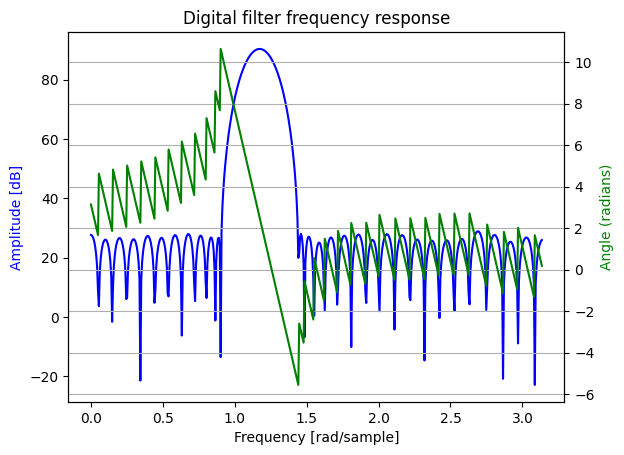

Bandpass


In [31]:
# plot the magnitude response and phase response of this filter using scipy.signal.freqz
w, h = signal.freqz(Bn)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

# what type of filter is this?
# lowpass, highpass, bandpass, bandstop
print("Bandpass")

Generating a test signal

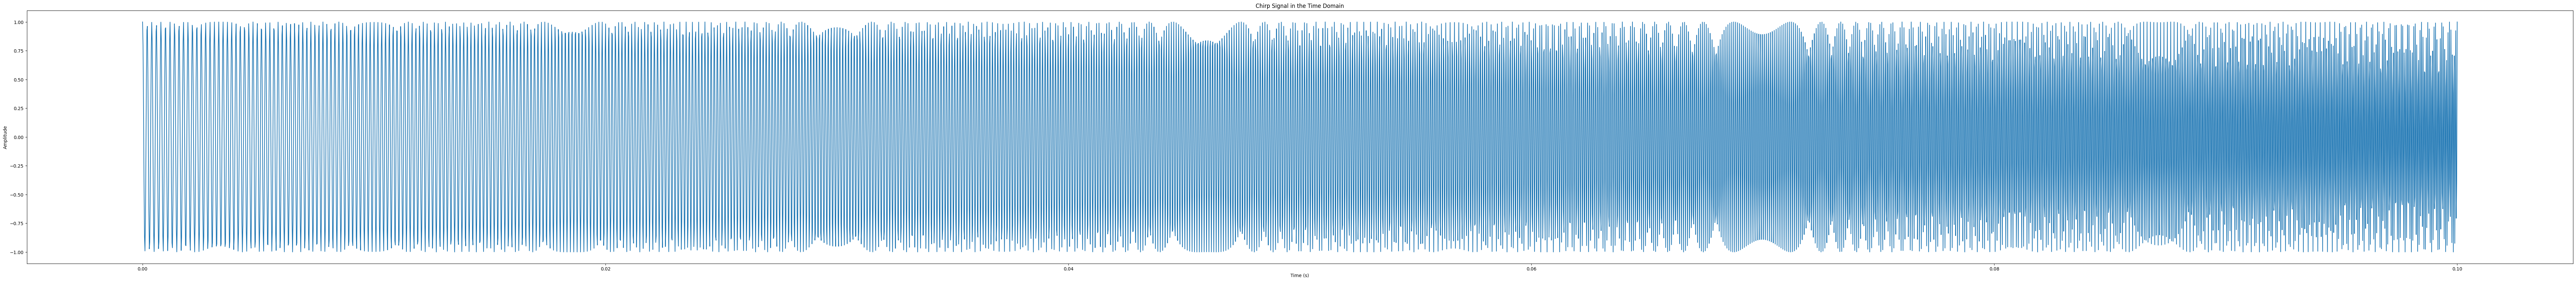

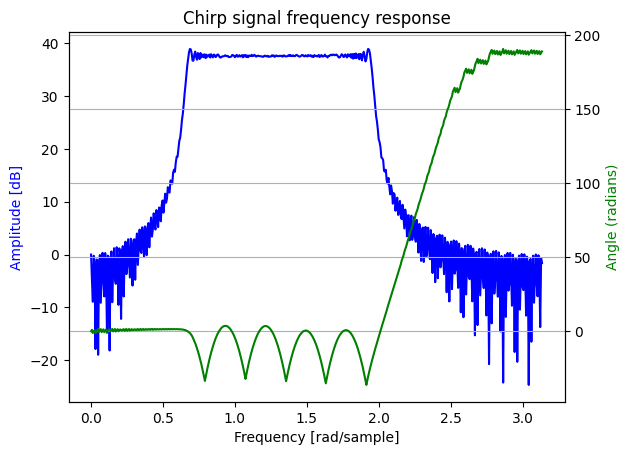

In [32]:
# Define the parameters
start_freq = 5000  # Starting frequency in Hz
end_freq = 15000  # Ending frequency in Hz
duration = 0.1  # Duration of the chirp signal in seconds
sample_rate = 48000  # Sampling frequency in Hz

# Generate the chirp signal
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=True)  # Time array
chirp_signal = signal.chirp(t, f0=start_freq, f1=end_freq, t1=duration, method='linear')

# Optionally, you can normalize the signal to have an amplitude of 1
chirp_signal /= np.max(np.abs(chirp_signal))

# Now, 'chirp_signal' contains the chirp signal.

# Plot the chirp signal in the time domain
plt.figure(figsize=(100, 10))
plt.plot(t, chirp_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Chirp Signal in the Time Domain')
plt.show()

# plot the magnitude spectrum of the chirp signal using signal.freqz
w_chirp, h_chirp = signal.freqz(chirp_signal)
fig, ax1 = plt.subplots()
ax1.set_title('Chirp signal frequency response')
ax1.plot(w_chirp, 20 * np.log10(abs(h_chirp)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles_chirp = np.unwrap(np.angle(h_chirp))
ax2.plot(w_chirp, angles_chirp, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()




In [33]:
# convert chirp signal to a table of fixed point representation with signed 16-bit integers and maximum value of 1
chirp_table_Q14 = np.round(chirp_signal * 2**14).astype(np.int16)
# print the length of the array
L = len(chirp_table_Q14)
print(L)

chirp_table_string = ",".join(chirp_table_Q14.astype(str))

# print the table to the console
print(chirp_table_string)

4800
16384,12996,4228,-6295,-14211,-16235,-11519,-2014,8331,15213,15760,9738,-349,-10294,-15941,-14924,-7660,2815,12113,16333,13697,5304,-5322,-13712,-16329,-12064,-2708,7795,15008,15876,10026,-72,-10144,-15916,-14932,-7604,2961,12269,16355,13471,4840,-5860,-14061,-16252,-11489,-1804,8657,15409,15548,9007,-1408,-11221,-16206,-14208,-6081,4673,13412,16356,12224,2798,-7844,-15088,-15786,-9627,719,10755,16113,14452,6488,-4310,-13229,-16369,-12350,-2924,7787,15087,15770,9528,-903,-10941,-16166,-14272,-6086,4788,13552,16330,11889,2185,-8490,-15406,-15490,-8698,1960,11751,16316,13618,4850,-6084,-14306,-16141,-10762,-567,9886,15913,14807,7056,-3865,-13054,-16374,-12326,-2724,8109,15287,15566,8812,-1929,-11801,-16331,-13462,-4486,6529,14582,16009,10153,-327,-10662,-16138,-14252,-5857,5218,13910,16238,11129,917,-9720,-15897,-14773,-6856,4219,13354,16338,11788,1796,-9029,-15684,-15086,-7504,3557,12973,16372,12171,2312,-8625,-15551,-15237,-7822,3245,12800,16379,12303,2469,-8524,-15527,-15251,-781

In [34]:
# Write data to file
def writes(data, datapath):
    # check that data only contains integers
    if not np.issubdtype(data.dtype, np.integer):
        raise ValueError('data must be integer type')

    if not np.issubdtype(data.dtype, np.int16):
        data = data.astype(np.int16)

    # check that data is 1D
    if data.ndim != 1:
        raise ValueError('data must be 1D')

    # write data to file in Little-endian ordering
    with open(datapath, 'wb') as f:
        data.tofile(f)


# Read data from file
def reads(datapath):
    # check that file exists
    if not os.path.isfile(datapath):
        raise ValueError('file does not exist')

    # read data from file in Little-endian ordering
    with open(datapath, 'rb') as f:
        data = np.fromfile(f, dtype=np.int16)
    return data

In [35]:
# write the chirp signal to export the chirp test signal to “input.pcm” format and datapath to des
writes(chirp_table_Q14, "/Volumes/T7/input.pcm")

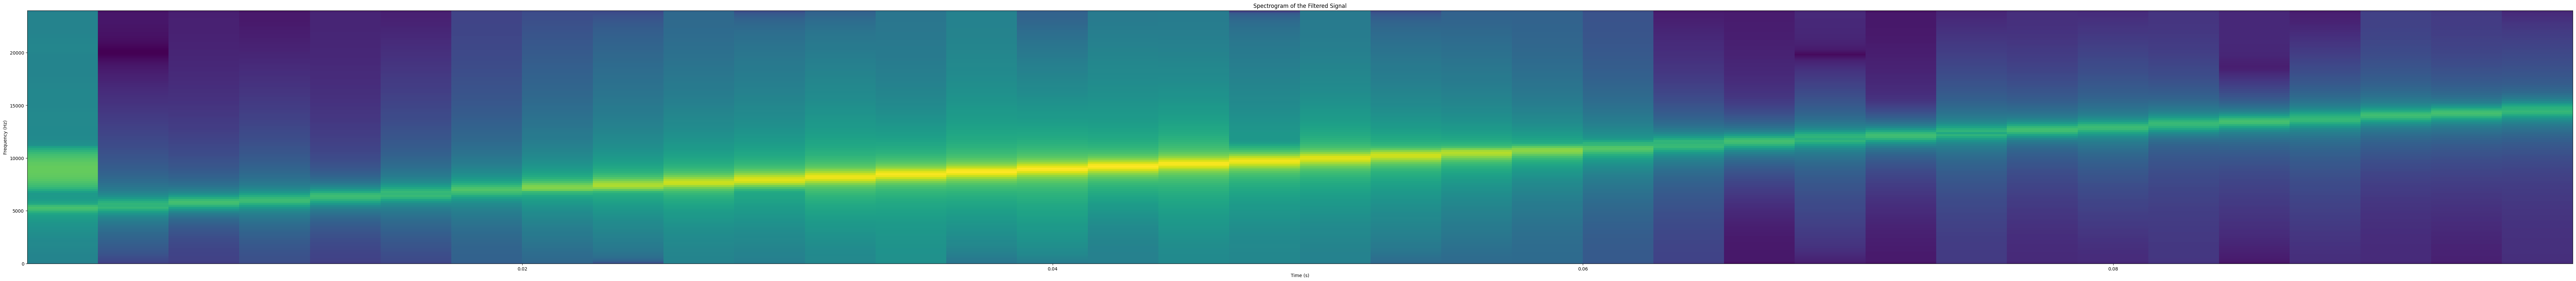

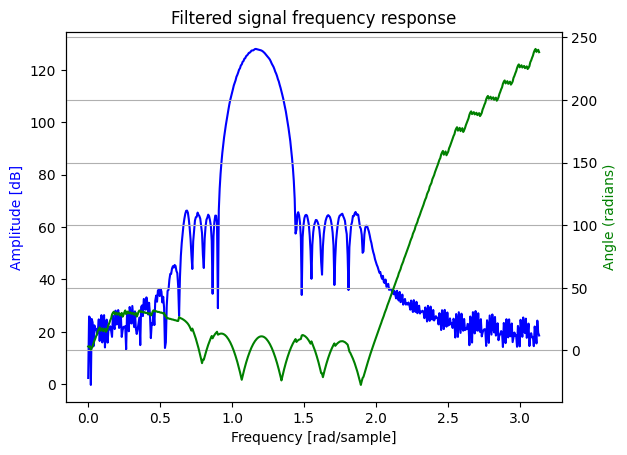

In [36]:
# filter the test signal chirp_signal with the FIR filter with taps Bn
y = signal.lfilter(Bn, 1, chirp_signal)

# Plot a spectrogram and magnitude plot of the filtered signal
plt.figure(figsize=(100, 10))
plt.specgram(y, Fs=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the Filtered Signal')
plt.show()

# plot the magnitude spectrum of the filtered signal using signal.freqz
w_y, h_y = signal.freqz(y)
fig, ax1 = plt.subplots()
ax1.set_title('Filtered signal frequency response')
ax1.plot(w_y, 20 * np.log10(abs(h_y)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles_y = np.unwrap(np.angle(h_y))
ax2.plot(w_y, angles_y, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()



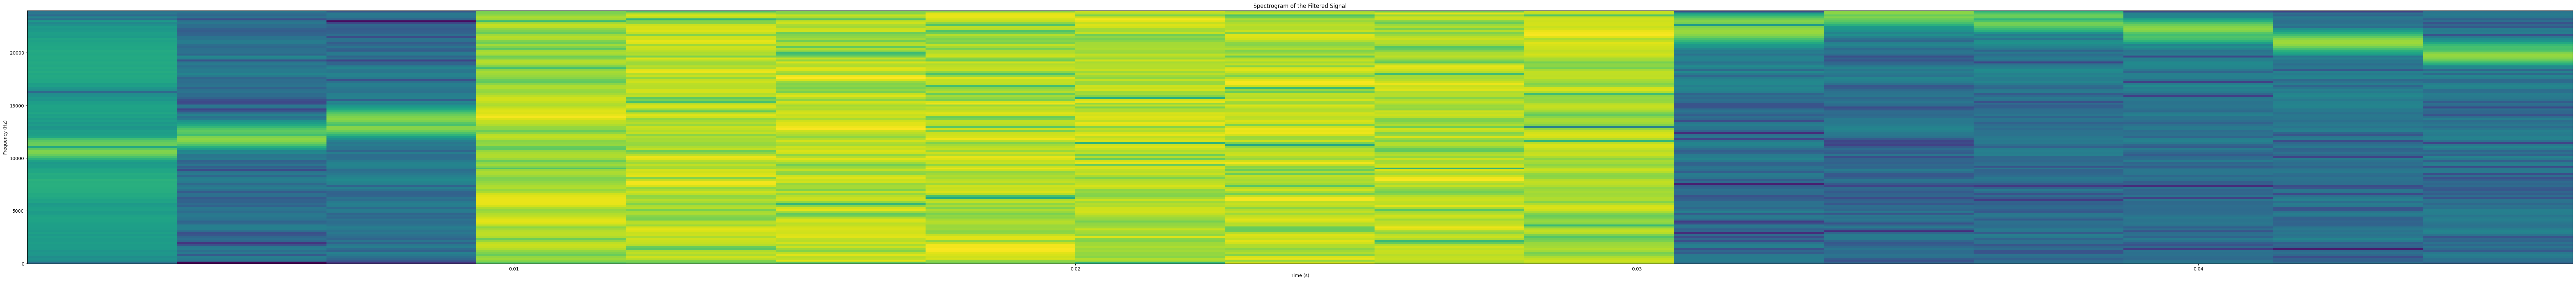

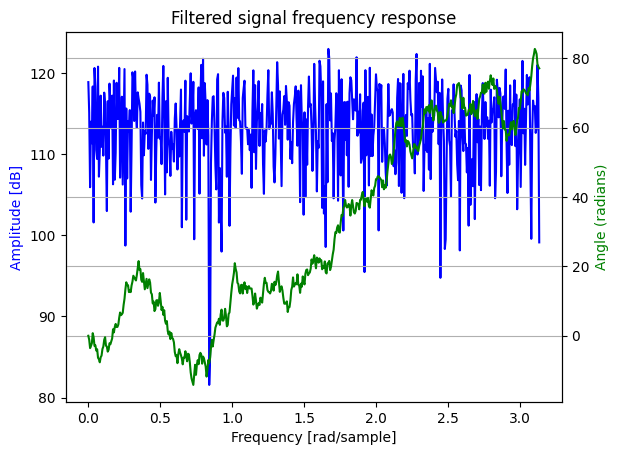

In [37]:
# read data from output.pcm
FIRdata = reads("/Volumes/T7/output.pcm")

# Plot a spectrogram and magnitude plot of the filtered signal
plt.figure(figsize=(100, 10))
plt.specgram(FIRdata, Fs=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the Filtered Signal')
plt.show()

# plot the magnitude spectrum of the filtered signal using signal.freqz
w_y, h_y = signal.freqz(FIRdata)
fig, ax1 = plt.subplots()
ax1.set_title('Filtered signal frequency response')
ax1.plot(w_y, 20 * np.log10(abs(h_y)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles_y = np.unwrap(np.angle(h_y))
ax2.plot(w_y, angles_y, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()
